In [16]:
!pip install scikit-fuzzy

Heating Power: 50.00000000000003


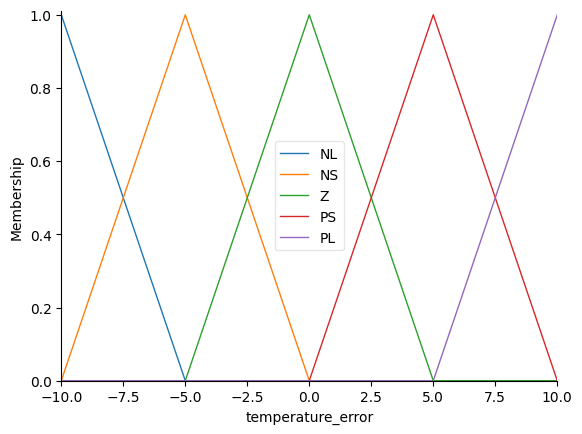

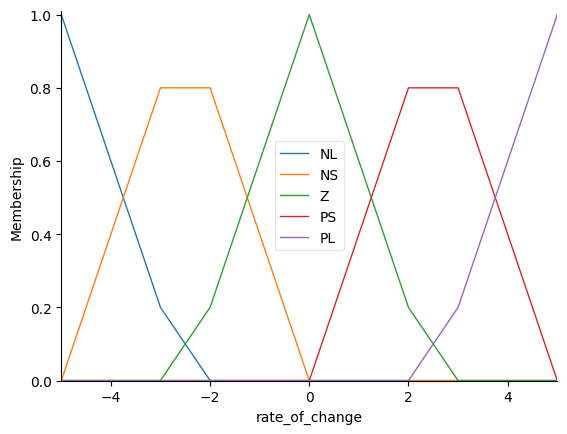

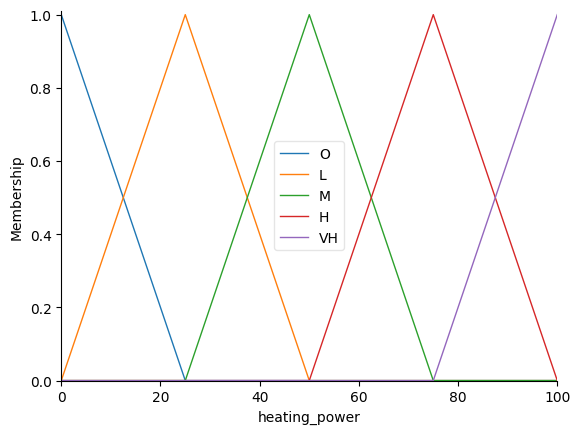

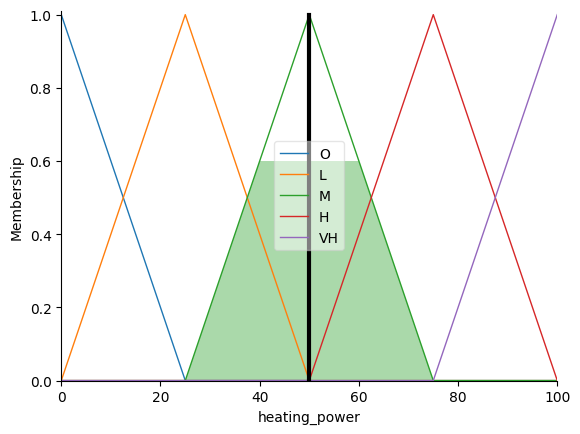

In [18]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# Define the universe of discourse for each variable
temperature_error = ctrl.Antecedent(np.arange(-10, 11, 1), 'temperature_error')
rate_of_change = ctrl.Antecedent(np.arange(-5, 6, 1), 'rate_of_change')
heating_power = ctrl.Consequent(np.arange(0, 101, 1), 'heating_power')

# Define the membership functions
temperature_error['NL'] = fuzz.trimf(temperature_error.universe, [-10, -10, -5])
temperature_error['NS'] = fuzz.trimf(temperature_error.universe, [-10, -5, 0])
temperature_error['Z'] = fuzz.trimf(temperature_error.universe, [-5, 0, 5])
temperature_error['PS'] = fuzz.trimf(temperature_error.universe, [0, 5, 10])
temperature_error['PL'] = fuzz.trimf(temperature_error.universe, [5, 10, 10])

rate_of_change['NL'] = fuzz.trimf(rate_of_change.universe, [-5, -5, -2.5])
rate_of_change['NS'] = fuzz.trimf(rate_of_change.universe, [-5, -2.5, 0])
rate_of_change['Z'] = fuzz.trimf(rate_of_change.universe, [-2.5, 0, 2.5])
rate_of_change['PS'] = fuzz.trimf(rate_of_change.universe, [0, 2.5, 5])
rate_of_change['PL'] = fuzz.trimf(rate_of_change.universe, [2.5, 5, 5])

heating_power['O'] = fuzz.trimf(heating_power.universe, [0, 0, 25])
heating_power['L'] = fuzz.trimf(heating_power.universe, [0, 25, 50])
heating_power['M'] = fuzz.trimf(heating_power.universe, [25, 50, 75])
heating_power['H'] = fuzz.trimf(heating_power.universe, [50, 75, 100])
heating_power['VH'] = fuzz.trimf(heating_power.universe, [75, 100, 100])

# Define the rules
rule1 = ctrl.Rule(temperature_error['NL'] & rate_of_change['NL'], heating_power['VH'])
rule2 = ctrl.Rule(temperature_error['NL'] & rate_of_change['NS'], heating_power['H'])
rule3 = ctrl.Rule(temperature_error['NL'] & rate_of_change['Z'], heating_power['H'])
rule4 = ctrl.Rule(temperature_error['NS'] & rate_of_change['NL'], heating_power['H'])
rule5 = ctrl.Rule(temperature_error['NS'] & rate_of_change['NS'], heating_power['M'])
rule6 = ctrl.Rule(temperature_error['NS'] & rate_of_change['Z'], heating_power['M'])
rule7 = ctrl.Rule(temperature_error['Z'] & rate_of_change['NS'], heating_power['L'])
rule8 = ctrl.Rule(temperature_error['Z'] & rate_of_change['Z'], heating_power['O'])
rule9 = ctrl.Rule(temperature_error['PS'] & rate_of_change['Z'], heating_power['L'])
rule10 = ctrl.Rule(temperature_error['PL'] & rate_of_change['PL'], heating_power['O'])

# Create the control system
heating_control = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10])
heating_simulation = ctrl.ControlSystemSimulation(heating_control)

# Plot membership functions
temperature_error.view()
rate_of_change.view()
heating_power.view()

# Simulate the control system with specific inputs
heating_simulation.input['temperature_error'] = -5
heating_simulation.input['rate_of_change'] = -1

# Compute the result
heating_simulation.compute()
print("Heating Power:", heating_simulation.output['heating_power'])

# Visualize the result
heating_power.view(sim=heating_simulation)

# Show all plots
plt.show()
